## Package

In [8]:
%load_ext autotime
RANDOM_STATE = 42

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
#from keras.preprocessing.image import ImageDataGenerator
#import visualkeras
from tensorflow.keras.optimizers import Adam

In [10]:
seed = 7
np.random.seed(seed)

In [11]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    #print(f"Image shape {img.shape}")
    return img

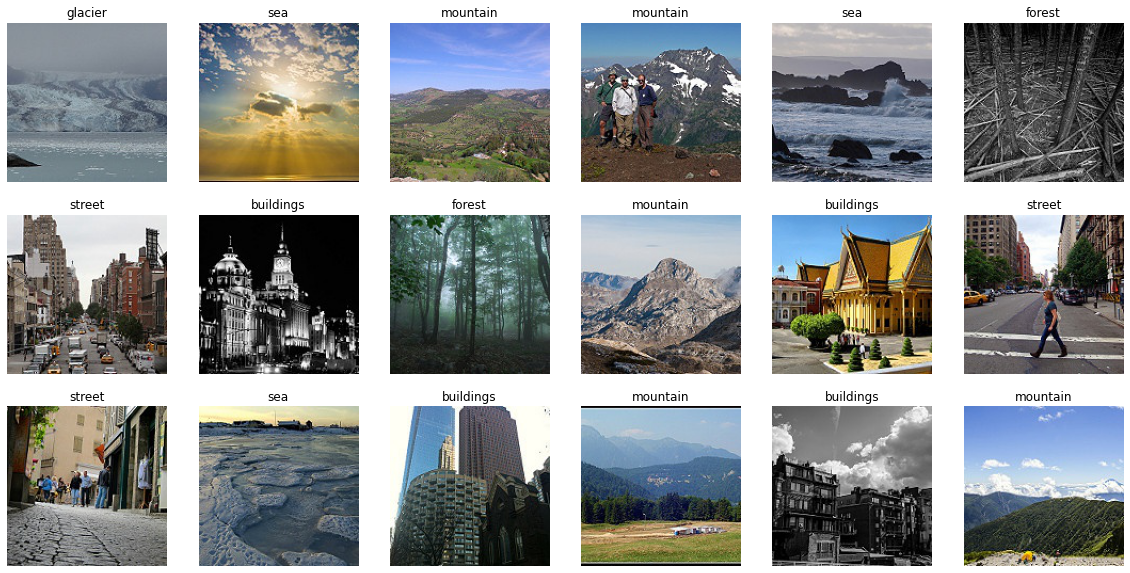

In [12]:
import random
import matplotlib.image as mpimg
from pathlib import Path
import os.path
class_names=['buildings', 'forest', 'glacier', 'mountain' ,'sea' ,'street']
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir='/home/abir/Downloads/greedyhpo/intel/archive/seg_train/seg_train/',target_class=class_name)

In [13]:
train_dir = "/home/abir/Downloads/greedyhpo/intel/archive/seg_train/seg_train"
test_dir = "/home/abir/Downloads/greedyhpo/intel/archive/seg_test/seg_test"
val_dir ="/home/abir/Downloads/greedyhpo/intel/archive/seg_val/seg_test/"

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255)

training_data = train_data.flow_from_directory(train_dir,
                                              batch_size = 32,
                                              target_size = (32,32), 
                                              class_mode = 'categorical')

val_data = ImageDataGenerator(rescale = 1./255)

validation_data = val_data.flow_from_directory(val_dir,
                                            batch_size = 32,
                                            target_size = (32,32), 
                                            class_mode = 'categorical')


test_data = ImageDataGenerator(rescale = 1./255)

testing_data = test_data.flow_from_directory(test_dir,
                                            batch_size = 32,
                                            target_size = (32,32), 
                                            class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [15]:
with tf.device('/device:GPU:1'):

    layer_sizes_1 = [16,32,64,128,256,512]
    layer_sizes_2 = [16,32,64,128,256,512]
    layer_sizes_3 = [16,32,64,128,256,512]
    layer_sizes_4 = [16,32,64,128,256,512]
    layer_sizes_5 = [16,32,64,128,256,512]
    dense_sizes_1 = [64,128,256,512]
    dense_sizes_2 = [64,128,256,512]
    learning_rates_1 = [1e-3,1e-1,1e-2,1e-4, 1e-5]
    dp_sizes_1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    dp_sizes_2 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    dp_sizes_3 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    dp_sizes_4 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    dp_sizes_5 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    dp_sizes_6 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    wd_sizes_1=[0,0.1, 0.001, 0.0001]
    temp=0
    test_acc=0
    opt_layer_1=16
    opt_layer_2=16
    opt_layer_3=16
    opt_layer_4=16
    opt_layer_5=16
    opt_layer_6=0.001
    opt_layer_7=64
    opt_layer_8=64
    ###############
    opt_layer_9=0.0
    opt_layer_10=0.0
    opt_layer_11=0.0
    opt_layer_12=0.0
    opt_layer_13=0.0
    opt_layer_14=0.0
    opt_layer_15=0.0
    ###############
    combinations=0
    flag=0
    count = False
    for wd_size_1 in wd_sizes_1:
        for dp_size_5 in dp_sizes_5:
            for layer_size_5 in layer_sizes_5:
                for dp_size_4 in dp_sizes_4:
                    for layer_size_4 in layer_sizes_4 :
                        for dp_size_3 in dp_sizes_3:
                            for layer_size_3 in layer_sizes_3:
                                for dp_size_2 in dp_sizes_2:
                                    for layer_size_2 in layer_sizes_2:
                                        for dp_size_1 in dp_sizes_1:
                                            for layer_size_1 in layer_sizes_1:
                                                for dp_size_6 in dp_sizes_6:
                                                    for dense_size_2 in dense_sizes_2:
                                                        for dense_size_1 in dense_sizes_1:
                                                            for learning_rate_1 in learning_rates_1:
                                                                print(learning_rate_1,dense_size_1,dense_size_2,dp_size_6,layer_size_1,dp_size_1,layer_size_2,dp_size_2,layer_size_3,dp_size_3,layer_size_4,dp_size_4,dp_size_5,layer_size_5)
                                                      #####################################Block 1############################################################
                                                                model = Sequential()
                                                                model.add(Conv2D(layer_size_1, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_1))
                                                                model.add(Conv2D(layer_size_1, (3, 3), activation='relu', padding = 'same',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
                                                      #####################################Block 2######################################################          
                                                                model.add(Conv2D(layer_size_2, (3, 3),padding ='same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_2))
                                                                model.add(Conv2D(layer_size_2, (3, 3),padding ='same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
                                                      ######################################Block 3##########################################################            
                                                                model.add(Conv2D(layer_size_3, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_3))
                                                                model.add(Conv2D(layer_size_3, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_3))
                                                                model.add(Conv2D(layer_size_3, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
                                                      ######################################Block 4######################################################## 
                                                                model.add(Conv2D(layer_size_4, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_4))
                                                                model.add(Conv2D(layer_size_4, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_4))
                                                                model.add(Conv2D(layer_size_4, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
                                                      ######################################Block 5######################################################## 
                                                                model.add(Conv2D(layer_size_5, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_5))
                                                                model.add(Conv2D(layer_size_5, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_5))
                                                                model.add(Conv2D(layer_size_5, (3, 3), padding = 'same', activation='relu',kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
                                                      ######################################################################################################
                                                                model.add(Dropout(dp_size_6))
                                                                model.add(Flatten())
                                                                model.add(Dense(units=dense_size_1,activation="relu",kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dense(units=dense_size_2,activation="relu",kernel_regularizer=regularizers.l2(wd_size_1)))
                                                                model.add(Dropout(dp_size_6))
                                                                model.add(Dense(units=6, activation="softmax"))
                                                      #######################################################################################################            

                                                                my_callbacks = [ tf.keras.callbacks.EarlyStopping(patience=3)]
                                                                opt = Adam(learning_rate=learning_rate_1)

                                                                model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                                                                              optimizer=opt,
                                                                              metrics=['accuracy'])

                                                                hist=model.fit(training_data,
                                                                          batch_size=64,
                                                                          epochs=100,
                                                                          validation_data=validation_data,
                                                                          callbacks=[my_callbacks])


                                                                _,test_acc = model.evaluate(validation_data)

                                                                print("Current Acc: ",test_acc)
                                                                print("Best Acc: ",temp)
                                                                combinations=combinations+1

                                                                if flag==0 :
                                                                    if test_acc > temp :
                                                                        opt_layer_6 = learning_rate_1
                                                                        temp=test_acc
                                                                    learning_rates_1 = [opt_layer_6]

                                                                elif flag==1 :
                                                                    if test_acc > temp :
                                                                        opt_layer_7 = dense_size_1
                                                                        temp=test_acc 
                                                                    dense_sizes_1 = [opt_layer_7]

                                                                elif flag==2 :
                                                                    if test_acc > temp :
                                                                        opt_layer_8 = dense_size_2
                                                                        temp=test_acc
                                                                    dense_sizes_2 = [opt_layer_8]
                                        ###############################################################################
                                                                elif flag==3 :
                                                                    if test_acc > temp :
                                                                        opt_layer_9 = dp_size_6
                                                                        temp=test_acc
                                                                    dp_sizes_6 = [opt_layer_9]

                                                                elif flag==4 :
                                                                    if test_acc > temp :
                                                                        opt_layer_1 = layer_size_1
                                                                        temp=test_acc
                                                                    layer_sizes_1 = [opt_layer_1]

                                                                elif flag==5 :
                                                                    if test_acc > temp :
                                                                        opt_layer_10 = dp_size_1
                                                                        temp=test_acc
                                                                    dp_sizes_1 = [opt_layer_10]
                                        ###############################################################################
                                                                elif flag==6:
                                                                    if test_acc > temp :
                                                                        opt_layer_2 = layer_size_2
                                                                        temp=test_acc
                                                                    layer_sizes_2 = [opt_layer_2]

                                                                elif flag==7 :
                                                                    if test_acc > temp :
                                                                        opt_layer_11 = dp_size_2
                                                                        temp=test_acc
                                                                    dp_sizes_2 = [opt_layer_11]                               

                                                                elif flag==8:
                                                                    if test_acc > temp :
                                                                        opt_layer_3 = layer_size_3
                                                                        temp=test_acc
                                                                    layer_sizes_3 = [opt_layer_3]
                                                                elif flag==9 :
                                                                    if test_acc > temp :
                                                                        opt_layer_12 = dp_size_3
                                                                        temp=test_acc
                                                                    dp_sizes_3 = [opt_layer_12]

                                                                elif flag==10:
                                                                    if test_acc > temp :
                                                                        opt_layer_4  = layer_size_4
                                                                        temp=test_acc
                                                                    layer_sizes_4 = [opt_layer_4]

                                                                elif flag==11 :
                                                                    if test_acc > temp :
                                                                        opt_layer_13 = dp_size_4
                                                                        temp=test_acc
                                                                    dp_sizes_4 = [opt_layer_13]

                                                                elif flag==12:
                                                                    if test_acc > temp :
                                                                        opt_layer_5  = layer_size_5
                                                                        temp=test_acc
                                                                    layer_sizes_5 = [opt_layer_5]
                                                                elif flag==13 :
                                                                    if test_acc > temp :
                                                                        opt_layer_14 = dp_size_5
                                                                        temp=test_acc
                                                                    dp_sizes_5 = [opt_layer_14]

                                                                elif flag==14 :
                                                                    if test_acc > temp :
                                                                        opt_layer_15 = wd_size_1
                                                                        temp=test_acc
                                                                    wd_sizes_1 = [opt_layer_15]

                                                            flag=1
                                                            test_acc=0
                                                        flag=2
                                                        test_acc=0
                                                    flag=3
                                                    test_acc=0
                                                flag=4
                                                test_acc=0
                                            flag=5
                                            test_acc=0
                                        flag=6
                                        test_acc=0
                                    flag=7
                                    test_acc=0
                                flag=8
                                test_acc=0
                            flag=9
                            test_acc=0
                        flag=10
                        test_acc=0  
                    flag=11
                    test_acc=0
                flag=12
                test_acc=0
            flag=13
            test_acc=0
        flag=14
        test_acc=0
    print("######################################################################################################")
    print("Trials : ",combinations)
    print("Optimal Validation Accuracy: ",temp)
    print("The Final Optimal Values for all block is : ")
    print('learning_rate_1: ',opt_layer_6,'\ndense_size_1: ',opt_layer_7,'\ndense_size_2: ',opt_layer_8,'\ndp_size_6: ',opt_layer_9,'\nlayer_size_1: ',opt_layer_1,'\ndp_size_1: ',opt_layer_10,'\nlayer_size_2: ',opt_layer_2,'\ndp_size_2: ',opt_layer_11,'\nlayer_size_3: ',opt_layer_3,'\ndp_size_3: ',opt_layer_12,'\nlayer_size_4: ',opt_layer_4,'\ndp_size_4: ',opt_layer_13,'\ndp_size_5: ',opt_layer_5,'\nlayer_size_5: ',opt_layer_14,'\ndweight_decay: ',opt_layer_15)

0.001 64 64 0.0 16 0.0 16 0.0 16 0.0 16 0.0 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.3522 - accuracy: 0.4034 - val_loss: 1.1147 - val_accuracy: 0.5071
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.0601 - accuracy: 0.5678 - val_loss: 0.9878 - val_accuracy: 0.6108
Epoch 3/100
439/439 [==============================] - 9s 20ms/step - loss: 0.9544 - accuracy: 0.6243 - val_loss: 0.9721 - val_accuracy: 0.6121
Epoch 4/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8954 - accuracy: 0.6508 - val_loss: 0.8864 - val_accuracy: 0.6571
Epoch 5/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8618 - accuracy: 0.6680 - val_loss: 0.8377 - val_accuracy: 0.6871
Epoch 6/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8052 - accuracy: 0.6979 - val_loss: 0.8222 - val_accuracy: 0.7058
Epoch 7/100
439/439 [==============================] - 9s 20ms/step - loss: 0.7494 -

439/439 [==============================] - 9s 20ms/step - loss: 1.0399 - accuracy: 0.5839 - val_loss: 1.0654 - val_accuracy: 0.5692
Epoch 49/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0348 - accuracy: 0.5866 - val_loss: 1.0528 - val_accuracy: 0.5829
Epoch 50/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0328 - accuracy: 0.5888 - val_loss: 1.0620 - val_accuracy: 0.5654
Epoch 51/100
439/439 [==============================] - 9s 21ms/step - loss: 1.0296 - accuracy: 0.5910 - val_loss: 1.0505 - val_accuracy: 0.5758
Epoch 52/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0241 - accuracy: 0.5927 - val_loss: 1.0471 - val_accuracy: 0.5804
Epoch 53/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0209 - accuracy: 0.5926 - val_loss: 1.0438 - val_accuracy: 0.5867
Epoch 54/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0170 - accuracy: 0.5984 - val_loss: 1.0493 - val_accuracy: 0.582

Epoch 2/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0167 - accuracy: 0.5936 - val_loss: 0.9659 - val_accuracy: 0.6221
Epoch 3/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8982 - accuracy: 0.6474 - val_loss: 0.9121 - val_accuracy: 0.6575
Epoch 4/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8664 - accuracy: 0.6637 - val_loss: 0.8346 - val_accuracy: 0.6804
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8114 - accuracy: 0.6887 - val_loss: 0.7866 - val_accuracy: 0.7067
Epoch 6/100
439/439 [==============================] - 9s 20ms/step - loss: 0.7838 - accuracy: 0.7058 - val_loss: 0.7963 - val_accuracy: 0.6988
Epoch 7/100
439/439 [==============================] - 9s 21ms/step - loss: 0.7305 - accuracy: 0.7241 - val_loss: 0.7611 - val_accuracy: 0.7225
Epoch 8/100
439/439 [==============================] - 9s 20ms/step - loss: 0.7152 - accuracy: 0.7379 - val_loss: 0.7799 - val_accuracy:

439/439 [==============================] - 9s 21ms/step - loss: 1.0470 - accuracy: 0.5765 - val_loss: 0.9916 - val_accuracy: 0.6042
Epoch 4/100
439/439 [==============================] - 9s 20ms/step - loss: 0.9798 - accuracy: 0.6086 - val_loss: 0.9810 - val_accuracy: 0.6021
Epoch 5/100
439/439 [==============================] - 9s 20ms/step - loss: 0.9289 - accuracy: 0.6362 - val_loss: 0.8831 - val_accuracy: 0.6538
Epoch 6/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8811 - accuracy: 0.6564 - val_loss: 0.8359 - val_accuracy: 0.6758
Epoch 7/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8442 - accuracy: 0.6724 - val_loss: 0.9061 - val_accuracy: 0.6413
Epoch 8/100
439/439 [==============================] - 9s 20ms/step - loss: 0.8091 - accuracy: 0.6942 - val_loss: 0.9019 - val_accuracy: 0.6471
Epoch 9/100
75/75 [==============================] - 1s 18ms/step - loss: 0.8426 - accuracy: 0.6800
Current Acc:  0.6800000071525574
Best Acc:  0.77

Epoch 5/100
439/439 [==============================] - 9s 20ms/step - loss: 1.7912 - accuracy: 0.1788 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 6/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7910 - accuracy: 0.1790 - val_loss: 1.7929 - val_accuracy: 0.1667
Epoch 7/100
439/439 [==============================] - 9s 20ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7927 - val_accuracy: 0.1667
Epoch 8/100
75/75 [==============================] - 1s 18ms/step - loss: 1.7926 - accuracy: 0.1667
Current Acc:  0.1666666716337204
Best Acc:  0.7754166722297668
0.001 64 256 0.8 16 0.0 16 0.0 16 0.0 16 0.0 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.7923 - accuracy: 0.1755 - val_loss: 1.7923 - val_accuracy: 0.1667
Epoch 2/100
439/439 [==============================] - 9s 20ms/step - loss: 1.7914 - accuracy: 0.1749 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 3/100
439/439 [==============================] - 9s 20ms/s

Epoch 2/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0157 - accuracy: 0.5926 - val_loss: 0.9191 - val_accuracy: 0.6329
Epoch 3/100
439/439 [==============================] - 9s 20ms/step - loss: 0.9312 - accuracy: 0.6317 - val_loss: 0.8795 - val_accuracy: 0.6513
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8672 - accuracy: 0.6622 - val_loss: 0.9871 - val_accuracy: 0.6400
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8196 - accuracy: 0.6858 - val_loss: 0.8607 - val_accuracy: 0.6712
Epoch 6/100
439/439 [==============================] - 9s 21ms/step - loss: 0.7798 - accuracy: 0.7076 - val_loss: 0.7766 - val_accuracy: 0.6992
Epoch 7/100
439/439 [==============================] - 9s 20ms/step - loss: 0.7264 - accuracy: 0.7343 - val_loss: 0.7754 - val_accuracy: 0.7138
Epoch 8/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6930 - accuracy: 0.7475 - val_loss: 0.7338 - val_accuracy:

Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.7895 - accuracy: 0.1767 - val_loss: 1.7925 - val_accuracy: 0.1667
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7912 - accuracy: 0.1766 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7923 - val_accuracy: 0.1667
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7929 - val_accuracy: 0.1667
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7910 - accuracy: 0.1790 - val_loss: 1.7927 - val_accuracy: 0.1667
Epoch 6/100
75/75 [==============================] - 1s 18ms/step - loss: 1.7927 - accuracy: 0.1667
Current Acc:  0.1666666716337204
Best Acc:  0.784583330154419
0.001 64 256 0.0 512 0.3 16 0.0 16 0.0 16 0.0 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 22ms/

Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8586 - accuracy: 0.6699 - val_loss: 0.8690 - val_accuracy: 0.6662
Epoch 6/100
439/439 [==============================] - 10s 22ms/step - loss: 0.8085 - accuracy: 0.6960 - val_loss: 0.8929 - val_accuracy: 0.6517
Epoch 7/100
439/439 [==============================] - 9s 20ms/step - loss: 0.7732 - accuracy: 0.7081 - val_loss: 0.7850 - val_accuracy: 0.7067
Epoch 8/100
439/439 [==============================] - 9s 21ms/step - loss: 0.7372 - accuracy: 0.7282 - val_loss: 0.7670 - val_accuracy: 0.7212
Epoch 9/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6955 - accuracy: 0.7435 - val_loss: 0.7568 - val_accuracy: 0.7154
Epoch 10/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6701 - accuracy: 0.7545 - val_loss: 0.7518 - val_accuracy: 0.7271
Epoch 11/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6410 - accuracy: 0.7678 - val_loss: 0.6885 - val_accura

Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1767 - val_loss: 1.7928 - val_accuracy: 0.1667
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1766 - val_loss: 1.7936 - val_accuracy: 0.1667
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7925 - val_accuracy: 0.1667
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7927 - val_accuracy: 0.1667
Epoch 6/100
439/439 [==============================] - 9s 20ms/step - loss: 1.7910 - accuracy: 0.1790 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 7/100
75/75 [==============================] - 1s 18ms/step - loss: 1.7926 - accuracy: 0.1667
Current Acc:  0.1666666716337204
Best Acc:  0.784583330154419
0.001 64 256 0.0 512 0.0 16 0.2 16 0.0 16 0.0 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/s

Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.6266 - accuracy: 0.2867 - val_loss: 1.9401 - val_accuracy: 0.1925
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.1144 - accuracy: 0.5550 - val_loss: 1.3616 - val_accuracy: 0.4542
Epoch 3/100
439/439 [==============================] - 9s 20ms/step - loss: 1.0258 - accuracy: 0.5910 - val_loss: 1.4198 - val_accuracy: 0.4283
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 0.9860 - accuracy: 0.6067 - val_loss: 1.1234 - val_accuracy: 0.5217
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 0.9595 - accuracy: 0.6247 - val_loss: 1.2870 - val_accuracy: 0.4929
Epoch 6/100
439/439 [==============================] - 9s 21ms/step - loss: 0.9408 - accuracy: 0.6327 - val_loss: 1.2602 - val_accuracy: 0.5079
Epoch 7/100
75/75 [==============================] - 1s 17ms/step - loss: 1.2400 - accuracy: 0.5117
Current Acc:  0.5116666555404663
Be

Epoch 13/100
75/75 [==============================] - 1s 17ms/step - loss: 0.6958 - accuracy: 0.7596
Current Acc:  0.7595833539962769
Best Acc:  0.784583330154419
0.001 64 256 0.0 512 0.0 16 0.0 256 0.0 16 0.0 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.3075 - accuracy: 0.4456 - val_loss: 1.0585 - val_accuracy: 0.5604
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.0241 - accuracy: 0.5936 - val_loss: 1.0671 - val_accuracy: 0.5967
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 0.9296 - accuracy: 0.6332 - val_loss: 0.8438 - val_accuracy: 0.6729
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8507 - accuracy: 0.6690 - val_loss: 0.8305 - val_accuracy: 0.6808
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 0.8157 - accuracy: 0.6866 - val_loss: 0.7952 - val_accuracy: 0.6946
Epoch 6/100
439/439 [==============================] - 9s 21ms

439/439 [==============================] - 9s 21ms/step - loss: 1.7909 - accuracy: 0.1769 - val_loss: 1.7935 - val_accuracy: 0.1667
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1768 - val_loss: 1.7929 - val_accuracy: 0.1667
Epoch 4/100
75/75 [==============================] - 1s 18ms/step - loss: 1.7931 - accuracy: 0.1667
Current Acc:  0.1666666716337204
Best Acc:  0.784583330154419
0.001 64 256 0.0 512 0.0 16 0.0 16 0.3 16 0.0 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.3852 - accuracy: 0.4260 - val_loss: 1.2430 - val_accuracy: 0.5038
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.0838 - accuracy: 0.5662 - val_loss: 0.9863 - val_accuracy: 0.6033
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.0184 - accuracy: 0.5932 - val_loss: 1.0209 - val_accuracy: 0.5979
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 

Epoch 6/100
439/439 [==============================] - 9s 20ms/step - loss: 0.7778 - accuracy: 0.7066 - val_loss: 0.8518 - val_accuracy: 0.6712
Epoch 7/100
439/439 [==============================] - 9s 21ms/step - loss: 0.7300 - accuracy: 0.7345 - val_loss: 0.7444 - val_accuracy: 0.7346
Epoch 8/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6697 - accuracy: 0.7582 - val_loss: 0.8272 - val_accuracy: 0.7142
Epoch 9/100
439/439 [==============================] - 9s 21ms/step - loss: 0.6414 - accuracy: 0.7736 - val_loss: 0.7566 - val_accuracy: 0.7346
Epoch 10/100
439/439 [==============================] - 9s 20ms/step - loss: 0.6079 - accuracy: 0.7830 - val_loss: 0.7217 - val_accuracy: 0.7425
Epoch 11/100
439/439 [==============================] - 9s 21ms/step - loss: 0.5683 - accuracy: 0.7987 - val_loss: 0.6954 - val_accuracy: 0.7450
Epoch 12/100
439/439 [==============================] - 9s 21ms/step - loss: 0.5347 - accuracy: 0.8102 - val_loss: 0.7480 - val_accura

439/439 [==============================] - 9s 21ms/step - loss: 1.7910 - accuracy: 0.1790 - val_loss: 1.7930 - val_accuracy: 0.1667
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7910 - accuracy: 0.1790 - val_loss: 1.7930 - val_accuracy: 0.1667
Epoch 6/100
75/75 [==============================] - 1s 17ms/step - loss: 1.7929 - accuracy: 0.1667
Current Acc:  0.1666666716337204
Best Acc:  0.784583330154419
0.001 64 256 0.0 512 0.0 16 0.0 16 0.0 16 0.2 0.0 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.7914 - accuracy: 0.1770 - val_loss: 1.7925 - val_accuracy: 0.1667
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7927 - val_accuracy: 0.1667
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.7911 - accuracy: 0.1743 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 4/100
75/75 [==============================] - 1s 18ms/step - loss: 1.

439/439 [==============================] - 10s 21ms/step - loss: 1.6703 - accuracy: 0.2506 - val_loss: 1.8148 - val_accuracy: 0.1996
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.2895 - accuracy: 0.4226 - val_loss: 1.9098 - val_accuracy: 0.2125
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.2055 - accuracy: 0.4597 - val_loss: 2.0051 - val_accuracy: 0.1912
Epoch 4/100
75/75 [==============================] - 1s 17ms/step - loss: 1.8589 - accuracy: 0.2171
Current Acc:  0.21708333492279053
Best Acc:  0.793749988079071
0.001 64 256 0.0 512 0.0 16 0.0 16 0.0 16 0.6 0.0 32
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.4499 - accuracy: 0.3841 - val_loss: 1.6889 - val_accuracy: 0.3787
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.1588 - accuracy: 0.5162 - val_loss: 1.0995 - val_accuracy: 0.5462
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss

439/439 [==============================] - 9s 21ms/step - loss: 0.8969 - accuracy: 0.6335 - val_loss: 1.0093 - val_accuracy: 0.5754
Epoch 12/100
75/75 [==============================] - 1s 18ms/step - loss: 0.9773 - accuracy: 0.6004
Current Acc:  0.6004166603088379
Best Acc:  0.793749988079071
0.001 64 256 0.0 512 0.0 16 0.0 16 0.0 16 0.6 0.4 16
Epoch 1/100
439/439 [==============================] - 10s 21ms/step - loss: 1.4545 - accuracy: 0.3641 - val_loss: 1.5097 - val_accuracy: 0.3250
Epoch 2/100
439/439 [==============================] - 9s 21ms/step - loss: 1.2146 - accuracy: 0.4474 - val_loss: 1.6957 - val_accuracy: 0.2571
Epoch 3/100
439/439 [==============================] - 9s 21ms/step - loss: 1.1585 - accuracy: 0.4709 - val_loss: 1.4687 - val_accuracy: 0.3275
Epoch 4/100
439/439 [==============================] - 9s 21ms/step - loss: 1.1138 - accuracy: 0.4927 - val_loss: 1.5847 - val_accuracy: 0.2979
Epoch 5/100
439/439 [==============================] - 9s 21ms/step - loss: